# Exploration & Nettoyage

In [1]:
%matplotlib inline

from operator import itemgetter
from collections import defaultdict

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA

pd.options.display.max_columns = 30

df = pd.read_csv('movie_metadata.csv')
df.shape

(5043, 28)

## 1. Description du dataset

### a) Vue d'ensemble des features

In [2]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
color,5024,2,Color,4815,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director_name,4939,2398,Steven Spielberg,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num_critic_for_reviews,4993,NaN,NaN,NaN,140.194,121.602,1,50,110,195,813
duration,5028,NaN,NaN,NaN,107.201,25.1974,7,93,103,118,511
director_facebook_likes,4939,NaN,NaN,NaN,686.509,2813.33,0,7,49,194.5,23000
actor_3_facebook_likes,5020,NaN,NaN,NaN,645.01,1665.04,0,133,371.5,636,23000
actor_2_name,5030,3032,Morgan Freeman,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
actor_1_facebook_likes,5036,NaN,NaN,NaN,6560.05,15020.8,0,614,988,11000,640000
gross,4159,NaN,NaN,NaN,4.84684e+07,6.8453e+07,162,5.34099e+06,2.55175e+07,6.23094e+07,7.60506e+08
genres,5043,914,Drama,236,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### b) Quelques exemples

In [3]:
df.sample(2).T

,2204,3245
color,Color,Color
director_name,Alejandro G. Iñárritu,Patrick Lussier
num_critic_for_reviews,285,62
duration,143,99
director_facebook_likes,0,71
actor_3_facebook_likes,51,126
actor_2_name,Harriet Walter,Craig Fairbrass
actor_1_facebook_likes,11000,298
gross,3.43008e+07,NaN
genres,Drama,Drama|Fantasy|Horror|Thriller


## 2. Nettoyage de lignes

### a) Doublons

In [4]:
duplicates = df[df.duplicated(subset='movie_imdb_link')]

len(duplicates)

124

In [5]:
df = df.drop_duplicates(subset='movie_imdb_link', keep='last')

df.shape

(4919, 28)

### b) Année non renseignée

In [6]:
df[df.title_year.isnull()]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
177,Color,NaN,21.0,60.0,NaN,184.0,Philip Michael Thomas,982.0,NaN,Action|Crime|Drama|Mystery|Thriller,Don Johnson,Miami Vice,16769,1687,John Diehl,2.0,cult tv|detective|drugs|police|undercover,http://www.imdb.com/title/tt0086759/?ref_=fn_t...,74.0,English,USA,TV-14,1500000.0,NaN,321.0,7.5,1.33,0
260,Color,NaN,29.0,60.0,NaN,432.0,Dirk Benedict,669.0,NaN,Action|Adventure|Crime,George Peppard,The A-Team,25402,1655,Dwight Schultz,4.0,1980s|cult tv|famous opening theme|good versus...,http://www.imdb.com/title/tt0084967/?ref_=fn_t...,97.0,English,USA,TV-PG,NaN,NaN,554.0,7.6,4.00,0
279,NaN,Christopher Barnard,NaN,22.0,0.0,NaN,NaN,5.0,NaN,Comedy,Mathew Buck,"10,000 B.C.",6,5,NaN,0.0,NaN,http://www.imdb.com/title/tt1869849/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.2,NaN,0
404,Color,NaN,103.0,44.0,NaN,148.0,Scott Thompson,544.0,NaN,Crime|Drama|Horror|Mystery|Thriller,Caroline Dhavernas,Hannibal,159910,996,Hettienne Park,1.0,blood|cannibalism|fbi|manipulation|psychiatrist,http://www.imdb.com/title/tt2243973/?ref_=fn_t...,270.0,English,USA,TV-14,NaN,NaN,183.0,8.6,1.78,59000
459,NaN,NaN,95.0,54.0,NaN,0.0,Royce Johnson,577.0,NaN,Action|Adventure|Crime|Drama|Sci-Fi|Thriller,Elden Henson,Daredevil,213483,581,Charlie Cox,0.0,corruption|lawyer|partnership|superhero|vigilante,http://www.imdb.com/title/tt3322312/?ref_=fn_t...,394.0,English,USA,TV-MA,NaN,NaN,4.0,8.8,16.00,55000
479,Black and White,NaN,31.0,25.0,NaN,474.0,Agnes Moorehead,1000.0,NaN,Comedy|Family|Fantasy,Elizabeth Montgomery,Bewitched,11427,2614,Dick York,1.0,connecticut|magic|marriage|witch|witchcraft,http://www.imdb.com/title/tt0057733/?ref_=fn_t...,71.0,English,USA,TV-G,NaN,NaN,960.0,7.6,4.00,0
537,Color,NaN,12.0,43.0,NaN,218.0,Matt Ryan,1000.0,NaN,Drama|Fantasy|Horror|Thriller,Harold Perrineau,Constantine,36919,1990,Charles Halford,1.0,based on comic|based on comic book|dc arrowver...,http://www.imdb.com/title/tt3489184/?ref_=fn_t...,94.0,English,USA,TV-14,NaN,NaN,560.0,7.5,16.00,10000
543,Color,NaN,12.0,45.0,NaN,0.0,Brent Sexton,374.0,NaN,Crime|Drama|Mystery,Adam Arkin,Life,29450,504,Damian Lewis,1.0,cop|murder|partner|police|protective male,http://www.imdb.com/title/tt0874936/?ref_=fn_t...,67.0,English,USA,NaN,NaN,NaN,130.0,8.3,NaN,0
593,Color,NaN,39.0,45.0,NaN,160.0,Katia Winter,898.0,NaN,Adventure|Drama|Fantasy|Mystery|Thriller,Nicole Beharie,Sleepy Hollow,49049,1430,Lyndie Greenwood,0.0,apocalypse|death|husband wife relationship|mot...,http://www.imdb.com/title/tt2647544/?ref_=fn_t...,110.0,English,USA,TV-14,NaN,NaN,372.0,7.5,16.00,14000


Ces titres dont l'année n'est pas renseignée sont des séries ou des émissions de télé.

In [7]:
df = df.dropna(subset=['title_year'])
df.reset_index(drop=True, inplace=True)

df.shape

(4813, 28)

### c) Taux de valeurs manquantes

In [8]:
col_info = pd.concat([df.dtypes, 
                      df.isnull().sum(),
                      (1 - (df.isnull().sum() / df.shape[0])) * 100], 
                     axis=1)

col_info.columns = ['type', 'null values', 'filling factor (%)']
col_info.sort_values('null values', ascending=False)

,type,null values,filling factor (%)
gross,float64,759,84.230210
budget,float64,386,91.980054
aspect_ratio,float64,304,93.683773
content_rating,object,259,94.618741
plot_keywords,object,138,97.132765
num_critic_for_reviews,float64,40,99.168918
actor_3_name,object,18,99.626013
actor_3_facebook_likes,float64,18,99.626013
num_user_for_reviews,float64,15,99.688344
color,object,15,99.688344


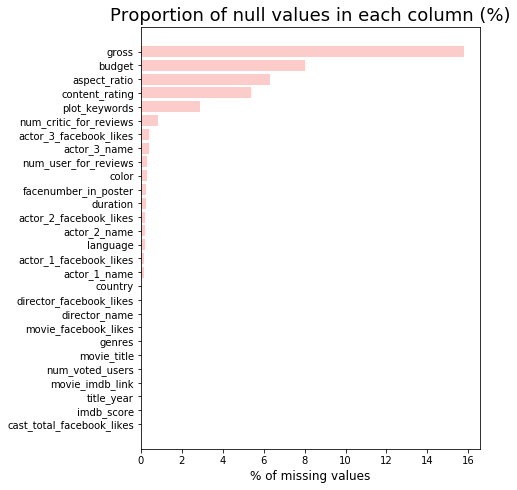

In [9]:
fig, ax = plt.subplots(figsize=(8, 8))

count = df.isnull().mean(axis=0).sort_values(ascending=True)

ax.set_title("Proportion of null values in each column (%)", size=18)
y = np.arange(len(count.index))
ax.barh(y=y, width=count.values*100, color='#FB9A99', alpha=0.5)
ax.set_yticks(y)
ax.set_yticklabels(count.index)
ax.set_xlabel("% of missing values", size=12)

plt.tight_layout(w_pad=0,pad=5)
plt.show()

## 3. Features numériques

### Recettes (gross)

In [10]:
df[(df.gross.isnull())]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
179,Color,Matt Birch,1.0,NaN,0.0,159.0,Dave Legeno,10000.0,NaN,Action|Fantasy,Rupert Grint,Harry Potter and the Deathly Hallows: Part II,381,11036,Ralph Ineson,1.0,NaN,http://www.imdb.com/title/tt1680310/?ref_=fn_t...,2.0,English,UK,NaN,NaN,2011.0,570.0,7.5,NaN,40
184,Color,Hideaki Anno,1.0,120.0,28.0,12.0,Shin'ya Tsukamoto,544.0,NaN,Action|Adventure|Drama|Horror|Sci-Fi,Mark Chinnery,Godzilla Resurgence,374,699,Atsuko Maeda,0.0,blood|godzilla|monster|sequel,http://www.imdb.com/title/tt4262980/?ref_=fn_t...,13.0,Japanese,Japan,NaN,NaN,2016.0,106.0,8.2,2.35,0
186,Color,Matt Birch,4.0,NaN,0.0,1000.0,Toby Jones,10000.0,NaN,Fantasy,Rupert Grint,Harry Potter and the Deathly Hallows: Part I,252,14719,Alfred Enoch,1.0,NaN,http://www.imdb.com/title/tt1571403/?ref_=fn_t...,2.0,English,UK,NaN,NaN,2010.0,2000.0,6.4,NaN,25
219,Color,Frédéric Forestier,33.0,116.0,0.0,141.0,Santiago Segura,936.0,NaN,Adventure|Comedy|Family|Fantasy,Alain Delon,Asterix at the Olympic Games,20567,1609,Vanessa Hessler,1.0,1st century b.c.|lightsaber|local blockbuster|...,http://www.imdb.com/title/tt0463872/?ref_=fn_t...,36.0,French,France,NaN,78000000.0,2008.0,276.0,5.1,2.35,291
380,Color,Bob Fosse,84.0,123.0,189.0,87.0,Ben Vereen,813.0,NaN,Comedy|Drama|Music|Musical,Roy Scheider,All That Jazz,19228,1476,Max Wright,0.0,dancer|editing|stand up comedian|surgery|vomiting,http://www.imdb.com/title/tt0078754/?ref_=fn_t...,146.0,English,USA,R,NaN,1979.0,388.0,7.8,1.85,0
442,Color,Lucile Hadzihalilovic,63.0,81.0,92.0,8.0,Roxane Duran,23.0,NaN,Drama|Horror|Mystery|Sci-Fi,Nissim Renard,Evolution,979,54,Julie-Marie Parmentier,0.0,boy|giving birth|nurse|sea|ultrasonography,http://www.imdb.com/title/tt4291590/?ref_=fn_t...,3.0,French,France,NaN,NaN,2015.0,21.0,6.4,2.35,257
460,Color,Andrés Couturier,3.0,89.0,0.0,20.0,David Hoffman,163.0,NaN,Animation|Family,Sariann Monaco,Top Cat Begins,230,370,Ben Diskin,0.0,NaN,http://www.imdb.com/title/tt4057916/?ref_=fn_t...,1.0,Spanish,Mexico,PG,8000000.0,2015.0,94.0,4.4,NaN,138
624,Color,John Milius,97.0,114.0,468.0,919.0,Jennifer Grey,1000.0,NaN,Action|Drama|War,Lea Thompson,Red Dawn,41776,3860,William Smith,0.0,guerrilla|high school|invasion|soviet|wolverine,http://www.imdb.com/title/tt0087985/?ref_=fn_t...,383.0,English,USA,PG-13,16900000.0,1984.0,1000.0,6.4,1.85,0
754,Color,Pou-Soi Cheang,14.0,119.0,3.0,22.0,Aaron Kwok,879.0,NaN,Action|Adventure|Fantasy,Li Gong,Xi you ji zhi: Sun Wukong san da Baigu Jing,1212,1026,Eddie Peng,1.0,buddhism|demon|journey to the west|monk|monkey...,http://www.imdb.com/title/tt4591310/?ref_=fn_t...,9.0,English,China,NaN,68005000.0,2016.0,107.0,6.0,2.35,426
763,Color,Frank Coraci,53.0,119.0,153.0,11000.0,Adam Sandler,12000.0,NaN,Comedy|Western,Taylor Lautner,The Ridiculous 6,27019,36167,Jon Lovitz,4.0,apache|bank robbery|baseball|half brothers|whi...,http://www.imdb.com/title/tt2479478/?ref_=fn_t...,143.0,English,USA,TV-14,NaN,2015.0,11000.0,4.9,2.35,0


Beaucoup de films n'ont pas leurs recettes renseignées et en plus il s'agit uniquement des recettes aux Etats-Unis.
Cette feature ne sera pas utilisée (pour le moment en tout cas).

### Budget

In [11]:
df.nlargest(10, 'budget')[['budget', 'movie_imdb_link', 'movie_title']]

,budget,movie_imdb_link,movie_title
2820,1.221550e+10,http://www.imdb.com/title/tt0468492/?ref_=fn_t...,The Host
3660,4.200000e+09,http://www.imdb.com/title/tt0451094/?ref_=fn_t...,Lady Vengeance
2837,2.500000e+09,http://www.imdb.com/title/tt0367082/?ref_=fn_t...,Fateless
2189,2.400000e+09,http://www.imdb.com/title/tt0119698/?ref_=fn_t...,Princess Mononoke
2200,2.127520e+09,http://www.imdb.com/title/tt0348121/?ref_=fn_t...,Steamboy
3239,1.100000e+09,http://www.imdb.com/title/tt0094625/?ref_=fn_t...,Akira
4319,1.000000e+09,http://www.imdb.com/title/tt0188640/?ref_=fn_t...,Godzilla 2000
2902,7.000000e+08,http://www.imdb.com/title/tt0449999/?ref_=fn_t...,Kabhi Alvida Naa Kehna
3652,7.000000e+08,http://www.imdb.com/title/tt0120274/?ref_=fn_t...,Tango
3095,6.000000e+08,http://www.imdb.com/title/tt1198101/?ref_=fn_t...,Kites


En regardant les films avec les plus gros budgets on se rend compte que les budgets ne sont pas tous exprimés dans la même monnaie. 
Cette feature n'étant pas fiable, nous ne l'utiliserons pas non plus.

### Année de sortie (title_year)

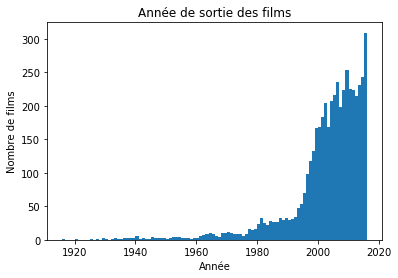

In [12]:
fig, ax = plt.subplots()

ax.hist(df.title_year, bins=100)
ax.set(title="Année de sortie des films", 
       xlabel="Année",
       ylabel="Nombre de films")

plt.show()

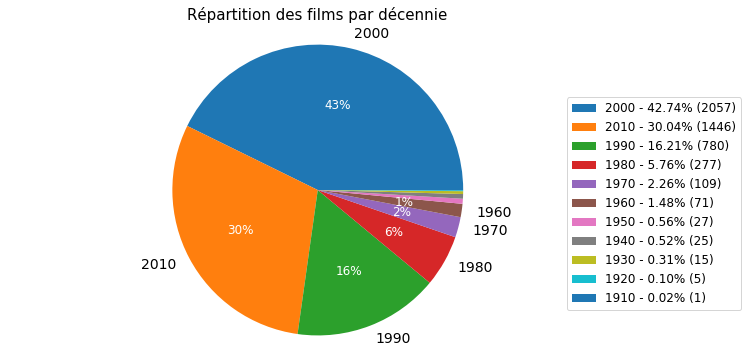

In [13]:
decades = df.title_year.apply(lambda x: ((x-1900)//10)*10+1900)

fig, ax = plt.subplots(figsize=(11, 6))
ax.set_title("Répartition des films par décennie", size=15)
sizes  = decades.value_counts()
percent = 100.*sizes/sum(sizes)

patches, texts, autotexts = ax.pie(sizes, labels=[int(_) for _ in sizes.index], 
                            shadow=False,
                            autopct=lambda x:'{:1.0f}%'.format(x) if x > 1 else '')
labels = [f"{int(x)} - {y:1.2f}% ({z})" for x,y,z in zip(sizes.index, percent, sizes)]
[_.set_fontsize(14) for _ in texts]
[_.set_text('') for _ in texts[6:]]
[_.update({'fontsize':12, 'color': 'w'}) for _ in autotexts]

ax.legend(patches, labels, loc='upper right',
          bbox_to_anchor=(1.2, 0.8), fontsize=12)
ax.axis('equal')

plt.show()

### Durée du film (duration)

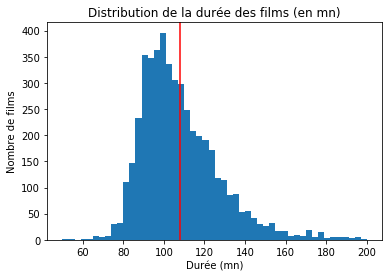

In [14]:
# On remplace par la moyenne
df.fillna(value={'duration': df['duration'].mean()}, inplace=True)

fig, ax = plt.subplots()

ax.hist(df.duration, bins=50, range=(50, 200))
ax.axvline(df.duration.mean(), color='r')
ax.set_title('Distribution de la durée des films (en mn)')
ax.set_xlabel('Durée (mn)')
ax.set_ylabel('Nombre de films')

plt.show()

### Imdb score

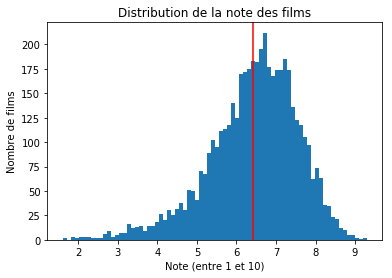

In [15]:
fig, ax = plt.subplots()

ax.hist(df.imdb_score, bins=76)
ax.axvline(df.imdb_score.mean(), color='r')
ax.set(title="Distribution de la note des films", 
       xlabel="Note (entre 1 et 10)",
       ylabel="Nombre de films")

plt.show()

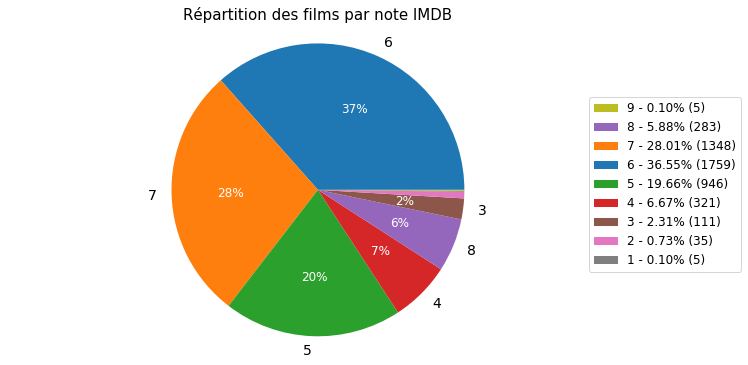

In [16]:
scores = df.imdb_score.apply(lambda x: (x//1))

fig, ax = plt.subplots(figsize=(11, 6))
ax.set_title("Répartition des films par note IMDB", size=15)
sizes  = scores.value_counts()
percent = 100.*sizes/sum(sizes)

patches, texts, autotexts = ax.pie(sizes, labels=[int(_) for _ in sizes.index], 
                                   shadow=False,
                                   autopct=lambda x:'{:1.0f}%'.format(x) if x > 1 else '')
labels = [f"{int(x)} - {y:1.2f}% ({z})" for x,y,z in zip(sizes.index, percent, sizes)]
[_.set_fontsize(14) for _ in texts]
[_.set_text('') for _ in texts[6:]]
[_.update({'fontsize':12, 'color': 'w'}) for _ in autotexts]

patches, labels =  zip(*sorted(zip(patches, labels),
                               key=lambda x: x[1],reverse=True))

ax.legend(patches, labels, loc='upper right',
          bbox_to_anchor=(1.2, 0.8), fontsize=12)
ax.axis('equal')

plt.show()

### Nombre de visages sur l'affiche (facenumber_in_poster)

In [17]:
df[df.facenumber_in_poster.isnull()][['movie_title', 'movie_imdb_link']]

,movie_title,movie_imdb_link
86,The Hobbit: An Unexpected Journey,http://www.imdb.com/title/tt0903624/?ref_=fn_t...
224,Teenage Mutant Ninja Turtles: Out of the Shadows,http://www.imdb.com/title/tt3949660/?ref_=fn_t...
1831,Dear John,http://www.imdb.com/title/tt0989757/?ref_=fn_t...
2846,Heaven Is for Real,http://www.imdb.com/title/tt1929263/?ref_=fn_t...
3192,Kicks,http://www.imdb.com/title/tt4254584/?ref_=fn_t...
3601,The Visit,http://www.imdb.com/title/tt3567288/?ref_=fn_t...
3654,Moms' Night Out,http://www.imdb.com/title/tt3014666/?ref_=fn_t...
4089,The Lost Medallion: The Adventures of Billy St...,http://www.imdb.com/title/tt1390539/?ref_=fn_t...
4225,Growing Up Smith,http://www.imdb.com/title/tt1105355/?ref_=fn_t...
4229,Wind Walkers,http://www.imdb.com/title/tt1236254/?ref_=fn_t...


c:\users\serphone\envs\ds_libs_tuto\lib\site-packages\numpy\lib\function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\serphone\envs\ds_libs_tuto\lib\site-packages\numpy\lib\function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


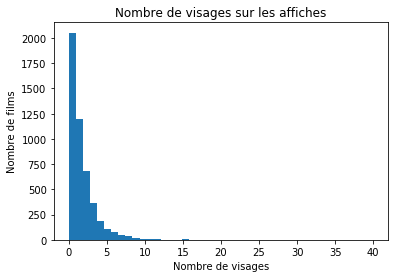

In [18]:
fig, ax = plt.subplots()

ax.hist(df.facenumber_in_poster, bins=43, range=(0, 40))
ax.set(title='Nombre de visages sur les affiches', 
       xlabel='Nombre de visages', ylabel='Nombre de films')

plt.show()

Variable peu fiable, certaines affiches n'ont pas le bon nombre de visages. De plus, l'affiche change régulièrement d'un pays à un autre. 
Nous n'utiliserons pas cette feature.

### Autres variables numériques

In [19]:
# On remplace les valeurs manquantes par 0
df.fillna(value={k:0 for k in ['actor_1_facebook_likes', 'actor_2_facebook_likes', 
                               'actor_3_facebook_likes', 'director_facebook_likes', 
                               'cast_total_facebook_likes', 'movie_facebook_likes',
                               'num_critic_for_reviews', 'num_user_for_reviews', 
                               'num_voted_users']}, 
          inplace=True)

### Corrélation

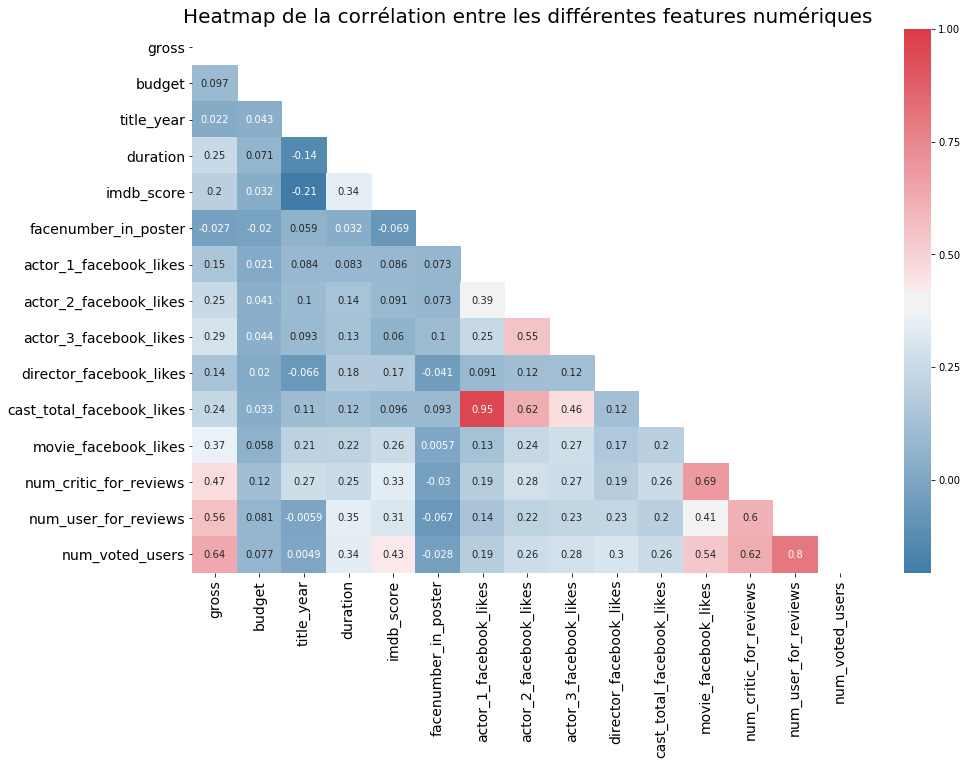

In [20]:
feat_num = ['gross', 'budget', 'title_year', 'duration', 'imdb_score', 'facenumber_in_poster',   
            'actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes', 
            'director_facebook_likes', 'cast_total_facebook_likes', 'movie_facebook_likes', 
            'num_critic_for_reviews', 'num_user_for_reviews', 'num_voted_users']

corr = df[feat_num].corr()

# To mask upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(15, 10))

cmap = sns.diverging_palette(240, 10, as_cmap=True)
ax = sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, annot_kws={"size": 10})
ax.set_title("Heatmap de la corrélation entre les différentes features numériques", size=20)
ax.tick_params(labelsize=14)

plt.show()

## 4. Features catégorielles

### Couleur ou noir et blanc

In [21]:
df.color.value_counts()

Color               4597
 Black and White     201
Name: color, dtype: int64

In [22]:
# Couleur = 1, N/B = 0 (par défaut = 1)
df['color'] = np.where(df.color == ' Black and White', 0, 1)

In [23]:
df.color.value_counts()

1    4612
0     201
Name: color, dtype: int64

Plus de 95% des films sont en couleur, ce n'est pas forcément indispensable de garder cette variable.

### Aspect_ratio & content_rating

In [24]:
print(f"{df.aspect_ratio.isnull().sum()} valeurs manquantes")
df.aspect_ratio.value_counts()

304 valeurs manquantes


2.35     2281
1.85     1867
1.37       99
1.78       92
1.66       63
1.33       42
2.39       15
2.20       14
16.00      13
2.00        4
2.76        3
2.40        3
1.75        3
2.55        2
1.50        2
1.20        1
1.18        1
1.44        1
1.77        1
1.89        1
2.24        1
Name: aspect_ratio, dtype: int64

In [25]:
print(f"{df.content_rating.isnull().sum()} valeurs manquantes")
df.content_rating.value_counts()

259 valeurs manquantes


R            2069
PG-13        1411
PG            686
Not Rated     114
G             112
Unrated        59
Approved       54
X              12
Passed          9
NC-17           7
GP              6
M               5
TV-G            4
TV-PG           3
TV-14           3
Name: content_rating, dtype: int64

### Genres (one-hot encoding)

In [26]:
df.genres.value_counts()

Drama                                         230
Comedy                                        196
Comedy|Drama                                  187
Comedy|Drama|Romance                          182
Comedy|Romance                                153
Drama|Romance                                 147
Crime|Drama|Thriller                           95
Horror                                         67
Action|Crime|Thriller                          62
Drama|Thriller                                 61
Action|Crime|Drama|Thriller                    61
Crime|Drama                                    59
Horror|Thriller                                52
Crime|Drama|Mystery|Thriller                   50
Documentary                                    49
Comedy|Crime                                   49
Action|Adventure|Sci-Fi                        48
Action|Adventure|Thriller                      44
Drama|Mystery|Thriller                         35
Biography|Drama                                35


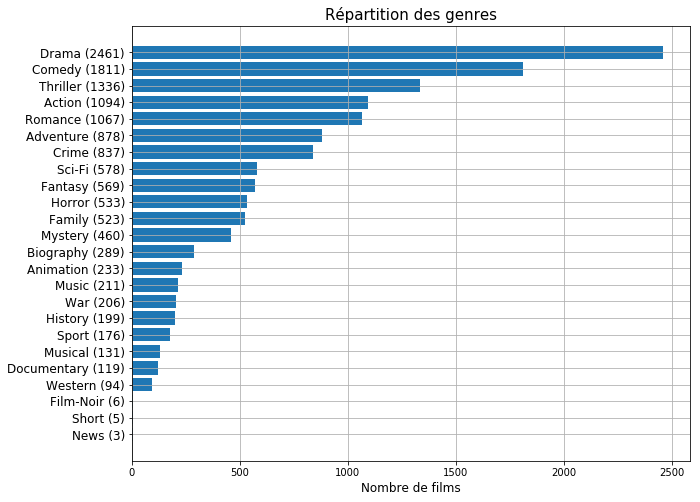

In [27]:
genres_count = defaultdict(int)
for genres_list in df.genres.str.split('|'):
    if genres_list:
        for genre in genres_list:
            genres_count[genre] += 1
genres_count = sorted(genres_count.items(), key=itemgetter(1), reverse=True)

fig, ax = plt.subplots(figsize=(10, 8))

ax.barh(y=np.arange(24),
        width=[x[1] for x in genres_count],
        tick_label=[f"{x[0]} ({x[1]})" for x in genres_count],
        label=[x[0] for x in genres_count])
ax.invert_yaxis()
ax.set_title("Répartition des genres", size=15)
ax.set_xlabel("Nombre de films", size=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.grid()

plt.show()

Nombre de genres différents: 24


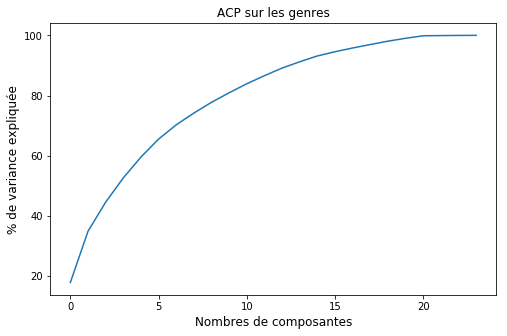

In [28]:
# One-hot encoding des genres
vect = CountVectorizer(token_pattern='[^\|]+')
X = vect.fit_transform(df.genres)
genres = pd.DataFrame(X.A, columns=vect.get_feature_names())

print(f'Nombre de genres différents: {len(genres.columns)}')

# ACP sur les genres
pca = PCA(n_components=24)
pca.fit(genres)

fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(pca.explained_variance_ratio_.cumsum()*100)
ax.set_title("ACP sur les genres", size=12)
ax.set_xlabel("Nombres de composantes", size=12)
ax.set_ylabel("% de variance expliquée", size=12)

plt.show()

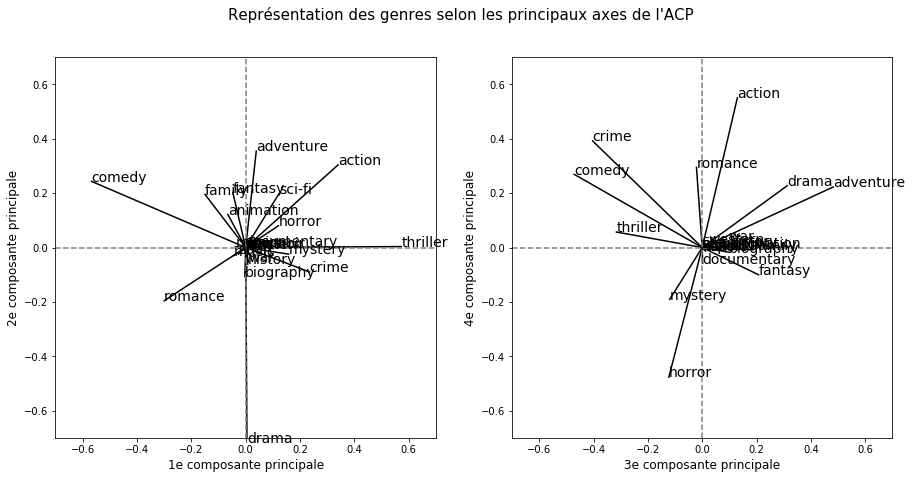

In [29]:
pcs = pca.components_

fig, ax = plt.subplots(1, 2, figsize=(15, 7))

fig.suptitle("Représentation des genres selon les principaux axes de l'ACP",
             size=15)

for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    # Afficher un segment de l'origine au point (x, y)
    ax[0].plot([0, x], [0, y], color='k')
    # Afficher le nom (genres.columns[i]) du genre
    ax[0].text(x, y, genres.columns[i], fontsize='14')
    
# Afficher une ligne horizontale y=0
ax[0].plot([-0.7, 0.7], [0, 0], color='grey', ls='--')
# Afficher une ligne verticale x=0
ax[0].plot([0, 0], [-0.7, 0.7], color='grey', ls='--')
# Forcer les limites des axes
ax[0].set_xlim([-0.7, 0.7])
ax[0].set_ylim([-0.7, 0.7])
ax[0].set_xlabel("1e composante principale", size=12)
ax[0].set_ylabel("2e composante principale", size=12)
    
    
for i, (x, y) in enumerate(zip(pcs[2, :], pcs[3, :])):
    # Afficher un segment de l'origine au point (x, y)
    ax[1].plot([0, x], [0, y], color='k')
    # Afficher le nom (genres.columns[i]) du genre
    ax[1].text(x, y, genres.columns[i], fontsize='14')

# Afficher une ligne horizontale y=0
ax[1].plot([-0.7, 0.7], [0, 0], color='grey', ls='--')
# Afficher une ligne verticale x=0
ax[1].plot([0, 0], [-0.7, 0.7], color='grey', ls='--')
# Forcer les limites des axes
ax[1].set_xlim([-0.7, 0.7])
ax[1].set_ylim([-0.7, 0.7])
ax[1].set_xlabel("3e composante principale", size=12)
ax[1].set_ylabel("4e composante principale", size=12)

plt.show()

### Pays et langue (one-hot encoding)

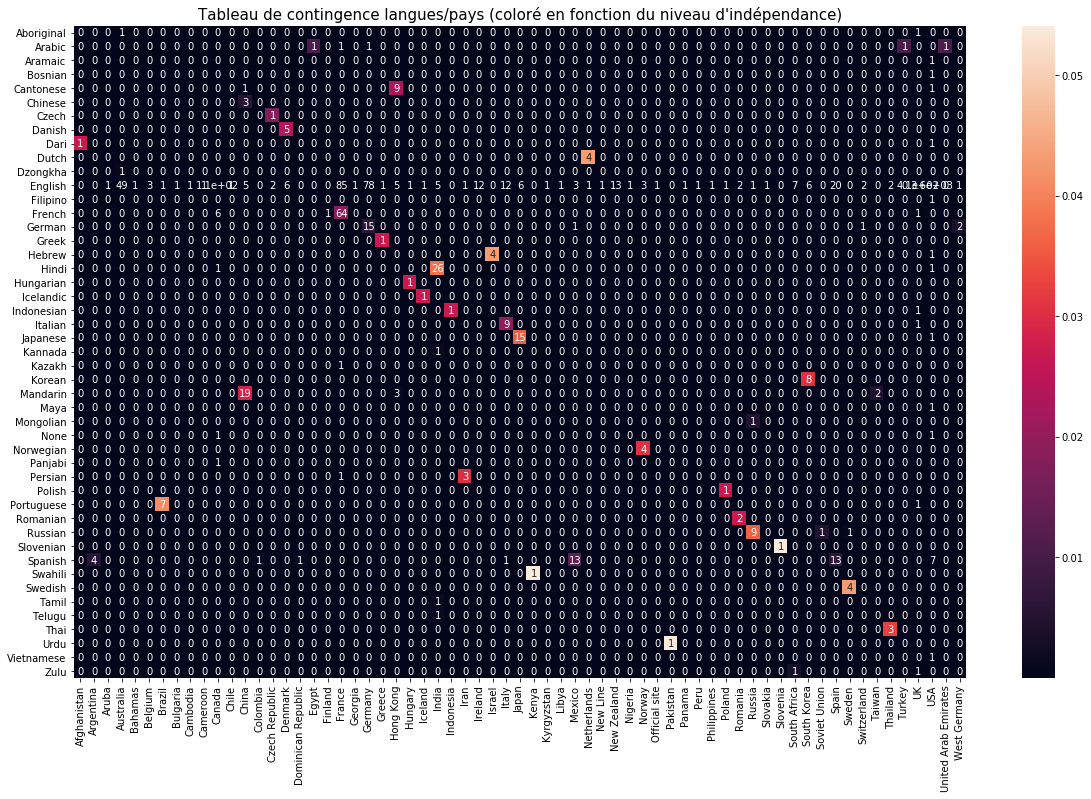

In [30]:
pivot = df[['country', 'language']].pivot_table(index='language', columns='country', aggfunc=len)

y = pd.DataFrame(df.country.value_counts())
x = pd.DataFrame(df.language.value_counts())

x.columns = ["count"]
y.columns = ["count"]
n = len(df)
indep = x.dot(y.T) / n
pivot = pivot.fillna(0)
mesure_indep = (pivot-indep)**2/indep
xi_n = mesure_indep.sum().sum()

fig, ax = plt.subplots(figsize=(20, 12))
ax = sns.heatmap(mesure_indep/xi_n,annot=pivot)
ax.set_title("Tableau de contingence langues/pays (coloré en fonction du niveau d'indépendance)", size=15)

plt.show()

In [31]:
print(df[df.country.isnull()].language)
print(df[df.language.isnull()].country)

# On remplace par la valeur probable (USA si la langue est en anglais et vice-versa)
df.fillna(value={'country': 'USA'}, inplace=True)
df.fillna(value={'language': 'English'}, inplace=True)

3813    English
Name: language, dtype: object
2912    USA
3350    USA
3670    USA
3900    USA
4190    USA
4407    USA
4584    USA
4657    USA
4729    USA
Name: country, dtype: object


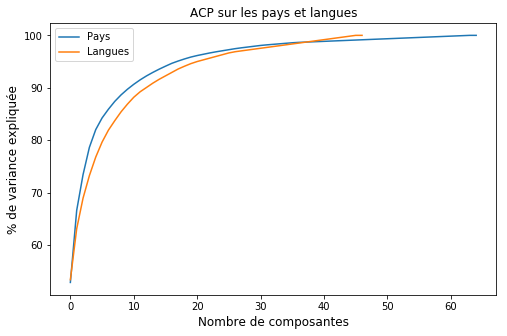

In [32]:
# One-hot encoding pays
vect = CountVectorizer(token_pattern='.+')
X = vect.fit_transform(df.country)
countries = pd.DataFrame(X.A, columns=vect.get_feature_names())
# ACP pays
pca1 = PCA(n_components=65)
pca1.fit(countries)

# One-hot encoding langues
vect = CountVectorizer()
X = vect.fit_transform(df.language)
languages = pd.DataFrame(X.A, columns=vect.get_feature_names())
# ACP langues
pca2 = PCA(n_components=47)
pca2.fit(languages)


fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(pca1.explained_variance_ratio_.cumsum()*100, label="Pays")
ax.plot(pca2.explained_variance_ratio_.cumsum()*100, label="Langues")

ax.set_title("ACP sur les pays et langues", size=12)
ax.set_xlabel("Nombre de composantes", size=12)
ax.set_ylabel("% de variance expliquée", size=12)
ax.legend()

plt.show()

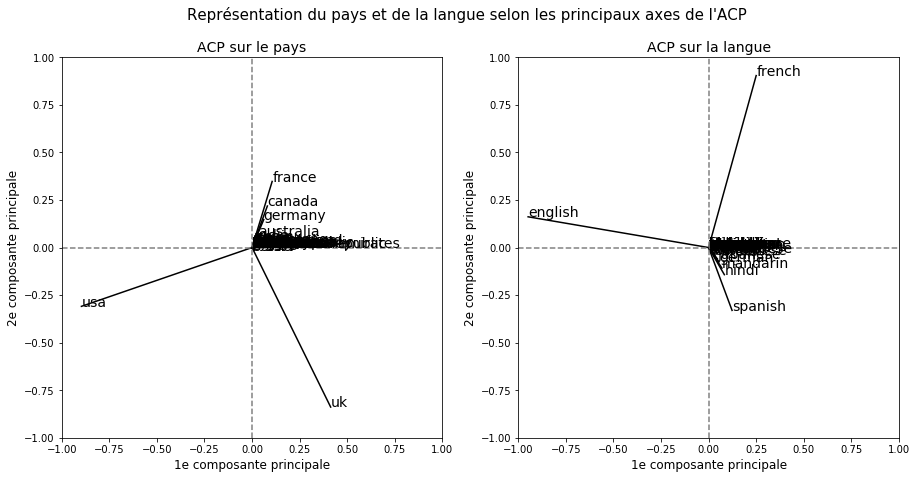

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

fig.suptitle("Représentation du pays et de la langue selon les principaux axes de l'ACP",
             size=15)

pcs = pca1.components_
for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    # Afficher un segment de l'origine au point (x, y)
    ax[0].plot([0, x], [0, y], color='k')
    # Afficher le nom (genres.columns[i]) du genre
    ax[0].text(x, y, countries.columns[i], fontsize='14')
    
# Afficher une ligne horizontale y=0
ax[0].plot([-1, 1], [0, 0], color='grey', ls='--')
# Afficher une ligne verticale x=0
ax[0].plot([0, 0], [-1, 1], color='grey', ls='--')
# Forcer les limites des axes
ax[0].set_xlim([-1, 1])
ax[0].set_ylim([-1, 1])
ax[0].set_title("ACP sur le pays", size=14)
ax[0].set_xlabel("1e composante principale", size=12)
ax[0].set_ylabel("2e composante principale", size=12)


pcs = pca2.components_
for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    # Afficher un segment de l'origine au point (x, y)
    ax[1].plot([0, x], [0, y], color='k')
    # Afficher le nom (genres.columns[i]) du genre
    ax[1].text(x, y, languages.columns[i], fontsize='14')

# Afficher une ligne horizontale y=0
ax[1].plot([-1, 1], [0, 0], color='grey', ls='--')
# Afficher une ligne verticale x=0
ax[1].plot([0, 0], [-1, 1], color='grey', ls='--')
# Forcer les limites des axes
ax[1].set_xlim([-1, 1])
ax[1].set_ylim([-1, 1])
ax[1].set_title("ACP sur la langue", size=14)
ax[1].set_xlabel("1e composante principale", size=12)
ax[1].set_ylabel("2e composante principale", size=12)

plt.show()

In [34]:
df2 = df.copy()

# Réduction nombre de pays par regroupement géographique
print(df2.country.unique())
print(df2.country.value_counts()[:20])

to_replace = {
    'New Line': 'USA',
    'Official site': 'USA', 
    'West Germany': 'Germany', 
    'Soviet Union': 'Russia', 
    'Denmark': 'Nordics', 
    'Sweden': 'Nordics', 
    'Norway': 'Nordics', 
    'Finland': 'Nordics',
    'Iceland': 'Nordics',
    'South Africa': 'Africa', 
    'Cameroon': 'Africa',
    'Nigeria': 'Africa', 
    'Kenya': 'Africa', 
    'Australia': 'AUNZ',
    'New Zealand': 'AUNZ', 
    'Hong Kong': 'China', 
    'Taiwan': 'Asia', 
    'Cambodia': 'Asia',
    'Thailand': 'Asia', 
    'Indonesia': 'Asia', 
    'Philippines': 'Asia',
    'Argentina': 'South America',
    'Chile': 'South America', 
    'Brazil': 'South America', 
    'Peru': 'South America', 
    'Colombia': 'South America',
    'Poland': 'Eastern Europe', 
    'Romania': 'Eastern Europe', 
    'Hungary': 'Eastern Europe', 
    'Bulgaria': 'Eastern Europe',   
    'Czech Republic': 'Eastern Europe',
    'Georgia': 'Eastern Europe',
    'Slovakia': 'Eastern Europe', 
    'Slovenia': 'Eastern Europe', 
    'Iran': 'Middle East', 
    'Libya': 'Middle East', 
    'Egypt': 'Middle East',
    'Israel': 'Middle East', 
    'Pakistan': 'Middle East', 
    'Afghanistan': 'Middle East', 
    'Turkey': 'Middle East',
    'Kyrgyzstan': 'Middle East',
    'United Arab Emirates': 'Middle East',
    'Belgium': 'Western Europe', 
    'Switzerland': 'Western Europe',
    'Netherlands': 'Western Europe', 
    'Ireland': 'Western Europe',
    'Greece': 'Western Europe',      
    'Bahamas': 'Central America', 
    'Dominican Republic': 'Central America',
    'Panama': 'Central America', 
    'Aruba': 'Central America'
}
df2 = df2.replace(to_replace=to_replace)

# Réduction nombre de langues
print(df2.language.unique())
print(df2.language.value_counts()[:20])

to_replace = {
    'Mandarin': 'Chinese',
    'Cantonese': 'Chinese'
}
df2 = df2.replace(to_replace=to_replace)

# On ne garde que les 19 principales, les autres sont regroupées sous "Other"
main_languages = df2.language.value_counts().nlargest(19).index
other_languages = set(df2.language.unique()) - set(main_languages)
df2 = df2.replace(to_replace=list(other_languages), value='Other')

['USA' 'UK' 'New Zealand' 'Canada' 'Germany' 'Australia' 'China' 'Japan'
 'France' 'New Line' 'Mexico' 'Spain' 'Hong Kong' 'Czech Republic' 'India'
 'Soviet Union' 'South Korea' 'Peru' 'Italy' 'Russia' 'Aruba' 'Denmark'
 'Libya' 'Belgium' 'Ireland' 'South Africa' 'Switzerland' 'Romania'
 'West Germany' 'Chile' 'Netherlands' 'Hungary' 'Panama' 'Greece' 'Sweden'
 'Taiwan' 'Official site' 'Cambodia' 'Thailand' 'Slovakia' 'Bulgaria'
 'Iran' 'Georgia' 'Iceland' 'Norway' 'Turkey' 'Nigeria' 'Brazil' 'Finland'
 'Bahamas' 'Argentina' 'Colombia' 'Poland' 'Israel' 'Egypt' 'Kyrgyzstan'
 'Indonesia' 'Pakistan' 'Slovenia' 'Afghanistan' 'Dominican Republic'
 'Cameroon' 'United Arab Emirates' 'Kenya' 'Philippines']
USA             3639
UK               420
France           152
Canada           120
Germany           94
Australia         51
India             34
Spain             33
China             28
Italy             22
Japan             21
Hong Kong         17
Mexico            17
South Korea       

In [35]:
# One-hot encoding des pays après réduction
vect = CountVectorizer(token_pattern=r'.+')
X = vect.fit_transform(df2.country.fillna(''))
countries_reduced = pd.DataFrame(X.A, columns=vect.get_feature_names())

# One-hot encoding des langues après réduction
vect = CountVectorizer()
X = vect.fit_transform(df2.language.fillna(''))
languages_reduced = pd.DataFrame(X.A, columns=vect.get_feature_names())

## 5. Features textuelles

### Réalisateurs

In [37]:
len(df.director_name.unique())

2395

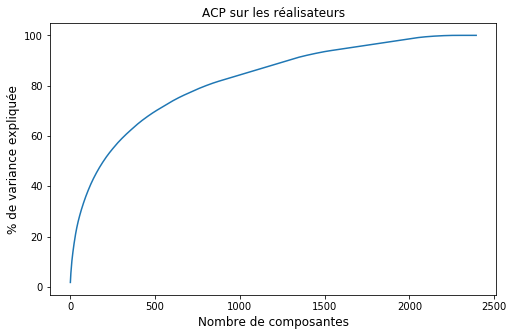

In [36]:
# One-hot encoding réalisateurs
vect = CountVectorizer()
X = vect.fit_transform(df.director_name.fillna(''))
directors = pd.DataFrame(X.A, columns=vect.get_feature_names())

# ACP réalisateurs
pca = PCA(n_components=2395)
pca.fit(directors)

fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(pca.explained_variance_ratio_.cumsum()*100)

ax.set_title("ACP sur les réalisateurs", size=12)
ax.set_xlabel("Nombre de composantes", size=12)
ax.set_ylabel("% de variance expliquée", size=12)

plt.show()

### Acteurs

In [38]:
actors = set(df.actor_1_name.unique()).union(df.actor_2_name.unique()).union(df.actor_3_name.unique())
len(actors)

6120

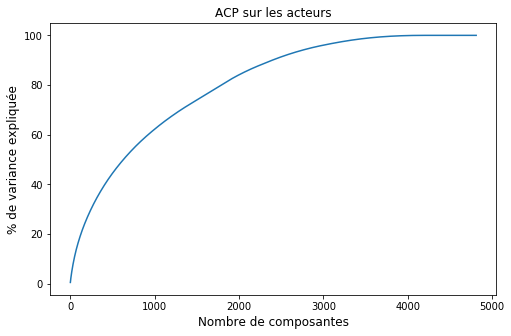

In [37]:
# Valeurs manquantes
df2 = df.copy()
df2.fillna(value={'actor_1_name': '', 'actor_2_name': '', 'actor_3_name': ''}, inplace=True)
df2['actors'] = df2[['actor_1_name', 'actor_2_name', 'actor_3_name']].apply(lambda x: ', '.join(x), axis=1)

# One-hot encoding acteurs
vect = CountVectorizer(tokenizer=lambda x: x.split(', '))
X = vect.fit_transform(df2.actors.fillna(''))
actors = pd.DataFrame(X.A, columns=vect.get_feature_names())

# ACP acteurs
pca = PCA(n_components=6120)
pca.fit(actors)


fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(pca.explained_variance_ratio_.cumsum()*100)
ax.set_title("ACP sur les acteurs", size=12)
ax.set_xlabel("Nombre de composantes", size=12)
ax.set_ylabel("% de variance expliquée", size=12)

plt.show()

### Plot keywords

In [38]:
set_keywords = set()
for liste_keywords in df['plot_keywords'].str.split('|').values:
    if isinstance(liste_keywords, float): continue  # si liste_keywords = NaN
    set_keywords = set_keywords.union(liste_keywords)
len(set_keywords)

7978

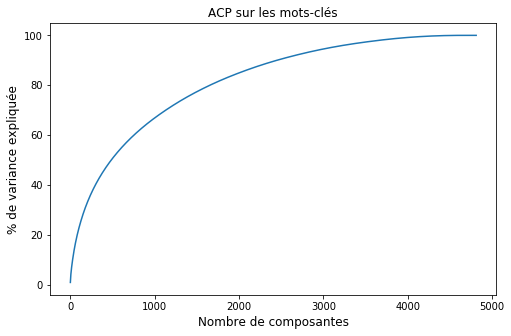

In [39]:
# Valeurs manquantes
df2 = df.copy()
df2.fillna(value={'plot_keywords': ''}, inplace=True)

# One-hot encoding mots-clés
vect = CountVectorizer(token_pattern='[^\|]+')
X = vect.fit_transform(df2.plot_keywords)
keywords = pd.DataFrame(X.A, columns=vect.get_feature_names())

# ACP mots-clés
pca = PCA(n_components=7978)
pca.fit(keywords)


fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(pca.explained_variance_ratio_.cumsum()*100)
ax.set_title("ACP sur les mots-clés", size=12)
ax.set_xlabel("Nombre de composantes", size=12)
ax.set_ylabel("% de variance expliquée", size=12)

plt.show()

## 6. Sauvegarde des données

In [37]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [53]:
df.to_csv('data_raw.csv', index=False)
genres.to_csv('ohe_genres.csv', index=False)
languages.to_csv('ohe_lang.csv', index=False)
languages_reduced.to_csv('ohe_lang_red.csv', index=False)
countries.to_csv('ohe_countries.csv', index=False)
countries_reduced.to_csv('ohe_countries_red.csv', index=False)